# 🧠 Classification vs Regression: Employee Dataset

In this notebook, we explore the difference between **classification** and **regression** using a simulated employee dataset.

### What we'll cover:
- 📊 Classification: Predict whether an employee is a *high performer* (1) or not (0)
- 📈 Regression: Predict an employee's *Productivity Score* (continuous value)
- 🔎 Visual exploration, data preprocessing, model training and evaluation

## 📦 Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

## 🏗️ Step 2: Create the Employee Dataset

In [2]:
# Simulate dataset
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(22, 60, 100),
    'Experience': np.random.randint(0, 35, 100),
    'Salary': np.random.randint(30000, 120000, 100),
    'Hours_Per_Week': np.random.randint(30, 50, 100)
})

# Target for regression
data['Productivity_Score'] = (
    0.3 * data['Hours_Per_Week'] +
    0.4 * (data['Experience'] / data['Age']) +
    0.2 * np.log(data['Salary'])
).round(2)

# Target for classification
data['High_Performer'] = (data['Productivity_Score'] > data['Productivity_Score'].median()).astype(int)

data.head()

,Age,Experience,Salary,Hours_Per_Week,Productivity_Score,High_Performer
0,50,0,90713,32,11.88,0
1,36,34,60306,37,13.68,0
2,29,13,46646,43,15.23,1
3,42,2,76843,47,16.37,1
4,40,0,46371,44,15.35,1


## 👁 Step 3: Explore the Dataset with Visualizations

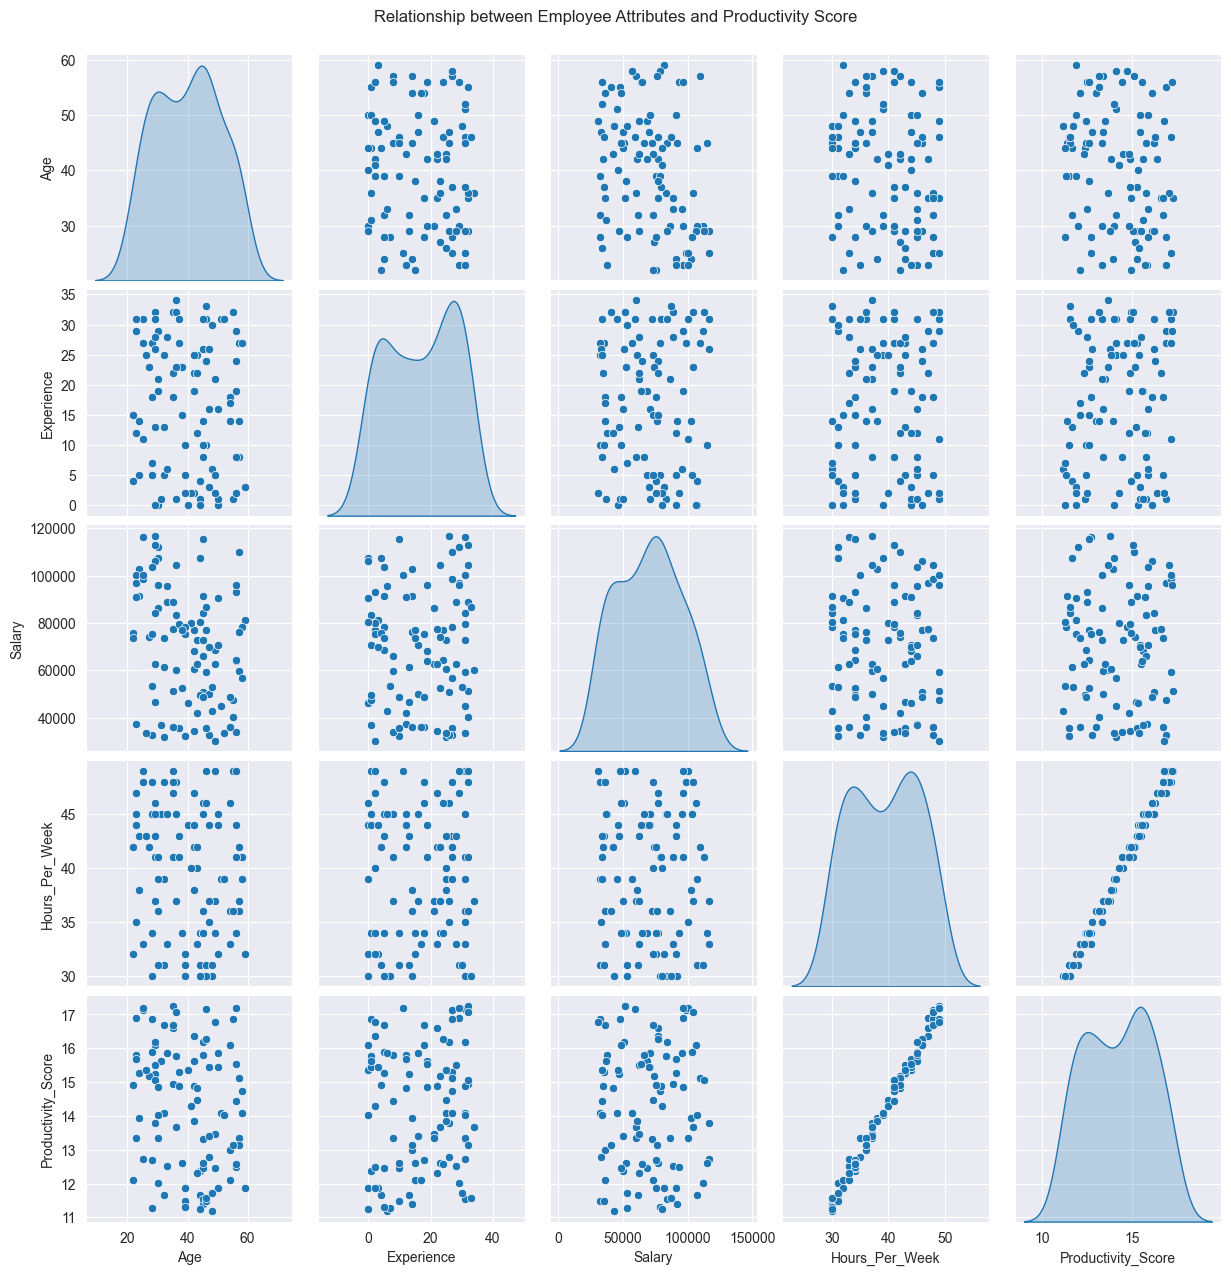

In [12]:
sns.pairplot(data[['Age', 'Experience', 'Salary', 'Hours_Per_Week', 'Productivity_Score']], diag_kind='kde')
plt.suptitle('Relationship between Employee Attributes and Productivity Score', y=1.02)
plt.show()

## 📊 Step 4: Classification – Predict High Performer

In [13]:
features = ['Age', 'Experience', 'Salary', 'Hours_Per_Week']
X_cls = data[features]
y_cls = data['High_Performer']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

🔍 Confusion Matrix:
[[14  0]
 [ 1 15]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 📌 Interpretation of Classification Results
- The **Confusion Matrix** helps us understand the number of correct and incorrect predictions.
- The **Classification Report** provides:
  - **Precision**: How many predicted 'High Performers' were actually high performers?
  - **Recall**: How many actual high performers were correctly identified?
  - **F1-score**: A balance of precision and recall.

If precision and recall are low, it means the model is struggling to separate high vs. low performers.

## 📈 Step 5: Regression – Predict Productivity Score

In [14]:
y_reg = data['Productivity_Score']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_cls, y_reg, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

print(f'MSE: {mean_squared_error(y_test_r, y_pred_r):.2f}')
print(f'R² Score: {r2_score(y_test_r, y_pred_r):.2f}')

MSE: 0.00
R² Score: 1.00


### 📌 Interpretation of Regression Results
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
  - Lower MSE is better.
- **R² Score**: Measures how well the model explains variability in the productivity score.
  - R² close to 1 means the model explains most of the variation.

If MSE is high or R² is low, the model may not be capturing important relationships in the data.

## ✅ Summary
- **Classification** predicts *categories* (e.g. 0 or 1).
- **Regression** predicts *continuous values* (e.g. productivity score).
- We used a shared employee dataset to demonstrate both models.
- Proper evaluation and interpretation of results help refine model performance.